<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [5]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


Connect to the database.


In [130]:
import sqlite3
conn = sqlite3.connect("C:\\Users\\farde\\Downloads\\m4_survey_data.sqlite") # open a database connection
%load_ext sql
%sql sqlite:///C:/Users/farde/Downloads/m4_survey_data.sqlite


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Import pandas module.


In [7]:
import pandas as pd

## Demo: How to run an sql query


In [17]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()                                                                                                                                                                       

,COUNT(*)
0,11398


In [155]:
QUERY = 'Select DevType, count(*) from DevType group by DevType order by count(*) desc'
df = pd.read_sql_query(QUERY, conn)
df.head(5)

,DevType,count(*)
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959


## Demo: How to list all tables


In [19]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [151]:
%sql select distinct DatabaseWorkedWith from DatabaseWorkedWith

 * sqlite:///C:/Users/farde/Downloads/m4_survey_data.sqlite
   sqlite:///m4_survey_data.sqlite
Done.


DatabaseWorkedWith
MySQL
SQLite
DynamoDB
PostgreSQL
Couchbase
Firebase
MongoDB
Microsoft SQL Server
Elasticsearch
MariaDB


In [134]:
%sql select LanguageDesireNextYear ,count(*) from LanguageDesireNextYear group by LanguageDesireNextYear order by count(*) desc;

 * sqlite:///C:/Users/farde/Downloads/m4_survey_data.sqlite
   sqlite:///m4_survey_data.sqlite
Done.


LanguageDesireNextYear,count(*)
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088
C#,3591
Bash/Shell/PowerShell,3097
Java,2953
Go,2759
Kotlin,1890


## Demo: How to run a group by query


In [23]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by count(*) desc
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,28.0,787
1,25.0,738
2,27.0,724
3,26.0,720
4,29.0,697
5,24.0,679
6,30.0,651
7,23.0,581
8,31.0,531
9,32.0,489


## Demo: How to describe a table


In [24]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

Plot a histogram of `ConvertedComp.`


<Axes: ylabel='Count'>

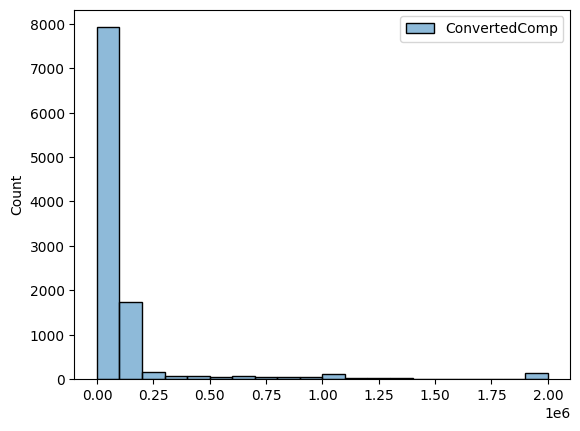

In [36]:
# your code goes here
QUERY = 'Select ConvertedComp from master'
df = pd.read_sql_query(QUERY, conn)
sns.histplot(df, bins=20)

### Box Plots


Plot a box plot of `Age.`


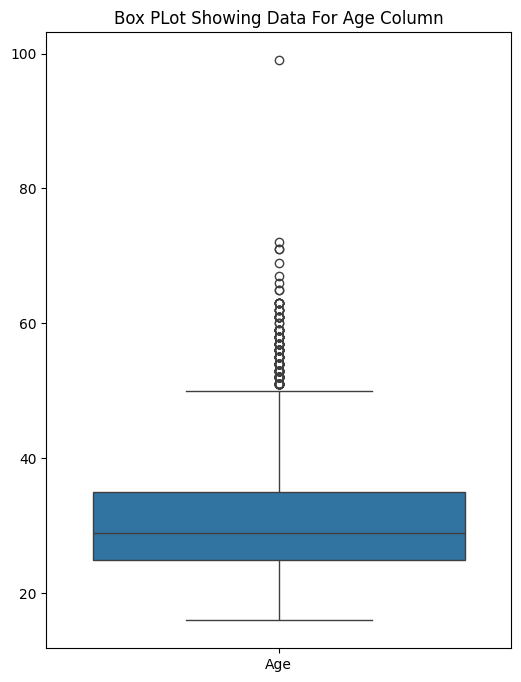

In [53]:
# your code goes here
QUERY = 'select Age from master'
df = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(6,8))
sns.boxplot(df)
plt.title('Box PLot Showing Data For Age Column')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


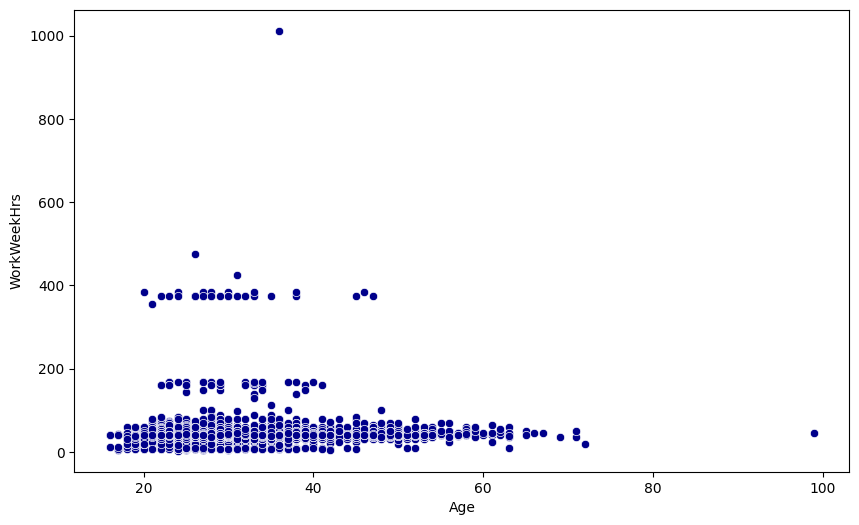

In [59]:
# your code goes here
QUERY = 'select Age, WorkWeekHrs from master'
df = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(10,6))
sns.scatterplot(df,x='Age', y='WorkWeekHrs', color='darkblue', markers='s')
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


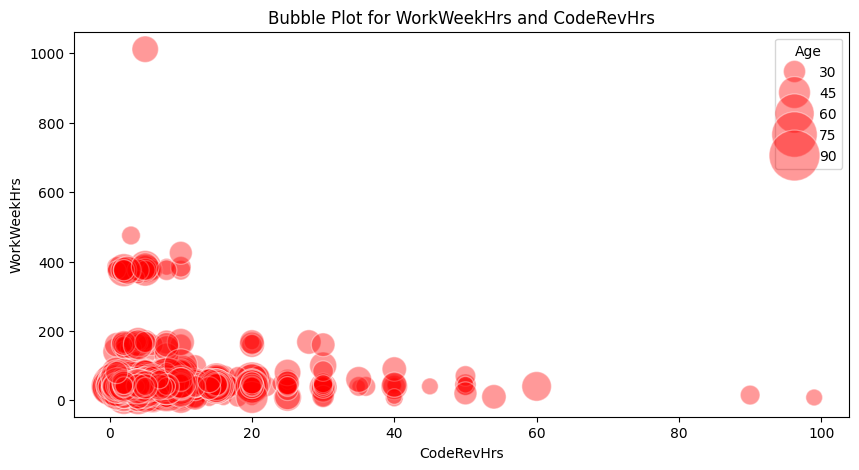

In [67]:
# your code goes here
QUERY = 'select WorkWeekHrs, CodeRevHrs, Age from master'
df = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(10,5))
sns.scatterplot(df, x='CodeRevHrs', y='WorkWeekHrs', size='Age', alpha=0.4, sizes=(1,1500), color='red')
plt.title('Bubble Plot for WorkWeekHrs and CodeRevHrs')
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


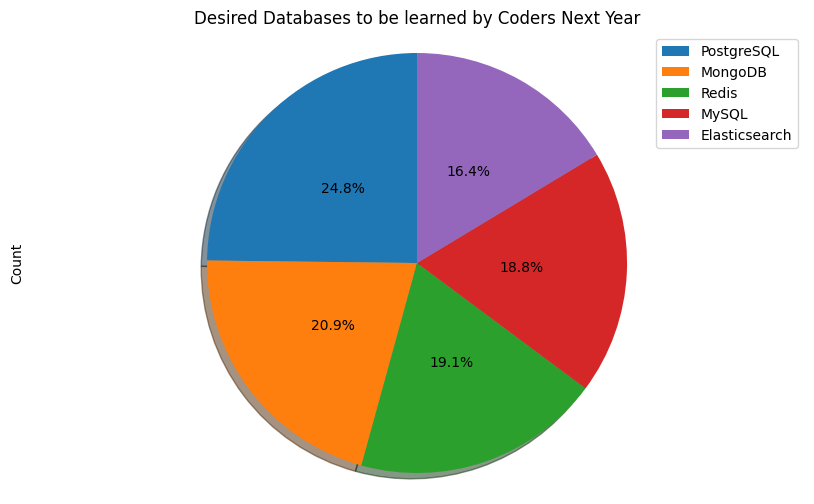

In [95]:
# your code goes here
QUERY = 'select DatabaseDesireNextYear,count(*) as Count from DatabaseDesireNextYear group by DatabaseDesireNextYear order by count(*) desc limit 5'
df = pd.read_sql_query(QUERY,conn)

df.plot(kind='pie', y='Count', labels=None, autopct='%1.1f%%', startangle=90, shadow=True, pctdistance=0.5, figsize=(10,6))
plt.legend(labels=df['DatabaseDesireNextYear'])
plt.title('Desired Databases to be learned by Coders Next Year')
plt.axis('equal')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [102]:
work_week

40.0

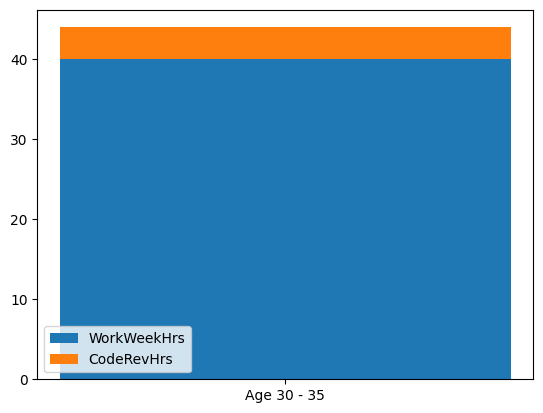

In [103]:
# your code goes here
QUERY = 'select WorkWeekHrs, CodeRevHrs from master where Age between 30 and 35'
df = pd.read_sql_query(QUERY, conn)
work_week = df['WorkWeekHrs'].median()
Code_rev = df['CodeRevHrs'].median()
fig, ax = plt.subplots()
ax.bar('Age 30 - 35', work_week, label='WorkWeekHrs')
ax.bar('Age 30 - 35', Code_rev, bottom=work_week, label='CodeRevHrs')
ax.legend()

## Visualizing comparison of data


### Line Chart


In [153]:
%sql select * from master limit 2

 * sqlite:///C:/Users/farde/Downloads/m4_survey_data.sqlite
   sqlite:///m4_survey_data.sqlite
Done.


index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,OrgSize,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,FizzBuzz,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,OpSys,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",100 to 499 employees,3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,No,I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,Less than once per month / Never,Home,A little below average,No,None,"No, but I think we should",Developers typically have the most influence on purchasing new technology,I have little or no influence,Windows,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software is about the same,Employed full-time,New Zealand,No,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering",10 to 19 employees,12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new opportunities",Less than a year ago,Yes,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the developers do it on their own",Not sure,I have some influence,MacOS,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,3-5 times per week,They were about the same,None,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult


<Axes: xlabel='Age'>

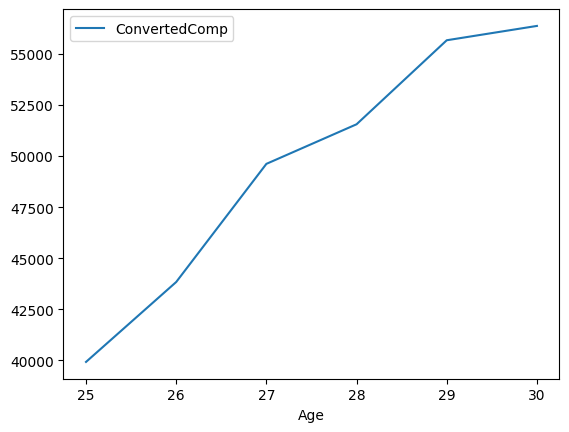

In [157]:
QUERY= 'Select Age, ConvertedComp from master where Age between 25 and 30'
df = pd.read_sql_query(QUERY,conn)
df_new = df.groupby(['Age'])['ConvertedComp'].median().reset_index()
df_new.plot(kind='line', x='Age', y='ConvertedComp')

Plot the median `ConvertedComp` for all ages from 45 to 60.


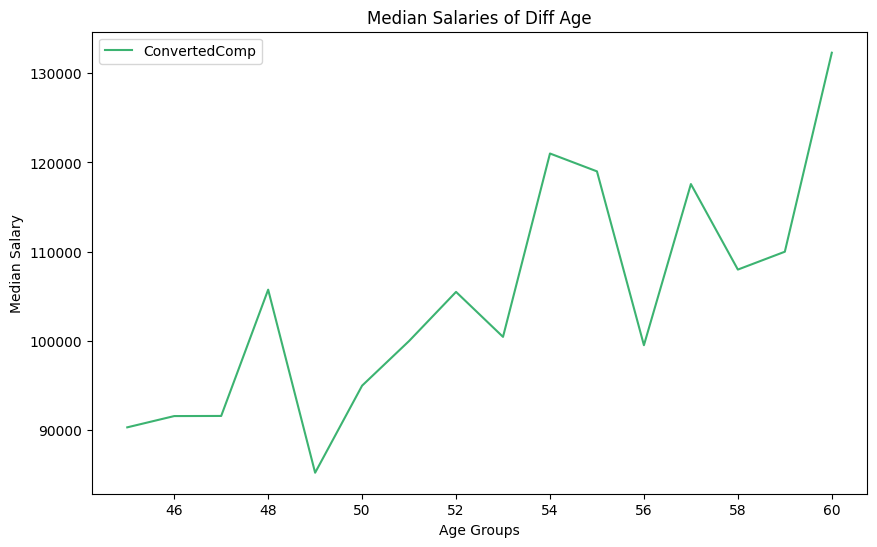

In [112]:
# your code goes here
QUERY = 'select Age, ConvertedComp from master where Age Between 45 and 60'
df = pd.read_sql_query(QUERY,conn)
df_new = df.groupby(['Age'])['ConvertedComp'].median().reset_index()
df_new.plot(kind='line', x='Age', y='ConvertedComp', title='Median Salaries of Diff Age', figsize=(10,6), color='mediumseagreen')
plt.xlabel('Age Groups')
plt.ylabel('Median Salary')
plt.show()



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [122]:
%sql select MainBranch, count(MainBranch) as Num_of_Respondants  from master group by MainBranch;

 * sqlite:///C:/Users/farde/Downloads/m4_survey_data.sqlite
   sqlite:///m4_survey_data.sqlite
Done.


MainBranch,Num_of_Respondants
I am a developer by profession,10618
"I am not primarily a developer, but I write code sometimes as part of my work",780


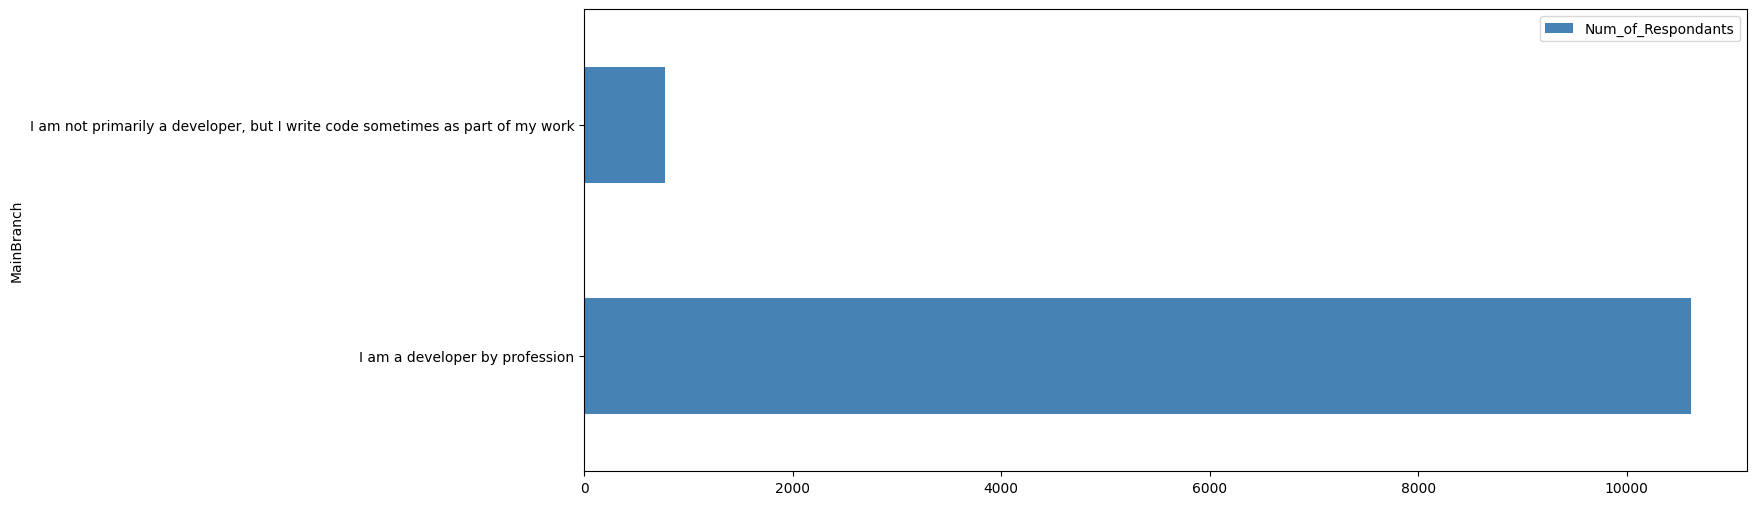

In [128]:
# your code goes here
QUERY = 'select MainBranch, count(MainBranch) as Num_of_Respondants  from master group by MainBranch;'
df = pd.read_sql_query(QUERY,conn)
df.plot(kind='barh', x='MainBranch', y='Num_of_Respondants', color='steelblue', figsize=(15,6))
plt.show()


Close the database connection.


In [129]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
